# Первая Лабораторная работа

#### Устанавливаем зависимости и подключаем библиотеки

In [44]:
# !pip install -r requirements.txt

In [45]:
import csv
import math
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import numpy as np
from typing import Dict

#### Считываем и сортируем данные

In [46]:
csvfile = open('data/r1z1.csv', 'r', newline='')
csvReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
rowData = [''.join(row) for row in csvReader][1:]
sortedData = list(map(float,rowData))
sortedData.sort()
frame = pandas.DataFrame(sortedData)

#### Вычисляем необходимые данные о выборке

In [47]:
results: Dict[str, float] = {}
results['selectionLength'] = len(sortedData)
results['minElement'] = min(sortedData)
results['maxElement'] = max(sortedData)
results['selectionRange'] = results['maxElement'] - results['minElement']
results['mean'] = round(sum(sortedData)/results['selectionLength'],2)
expr = (results['selectionLength']-1)/2
results['median'] = sortedData[expr+1] if expr==int(expr) else (sortedData[int(expr)+1] + sortedData[int(expr)+2])/2
results['absoluteMeanDeviation'] = abs(round((sum([x-results['mean'] for x in sortedData]))/results['selectionLength'],3))
results['dispersion'] = round(sum([(x-results['mean'])**2 for x in sortedData])/(results['selectionLength']-1),2)
results['standardDeviation'] = round(math.sqrt(results['dispersion']),2)
results['asymmetryCoefficient'] = round(sum([(x-results['mean'])**3 for x in sortedData])/(results['selectionLength']*results['standardDeviation']**3),2)

In [48]:
def getQuartile(data: list[float], n: float, param: float) -> float:
    expr = (n - 1) * param
    return data[expr+1] if expr==int(expr) else (data[int(expr)+1] + data[int(expr)+2])/2
results['firstQuartile'] = getQuartile(sortedData, results['selectionLength'], 0.25)
results['thirdQuartile'] = getQuartile(sortedData, results['selectionLength'], 0.75)
results['interquartileLatitude'] = results['thirdQuartile'] - results['firstQuartile']

#### Вычисляем необходимые данные с помощью готовых функций из пакетов pandas, numpy, scipy

In [49]:
packageResults = {}
packageResults['mean'] = round(frame.mean().values[0],2)
packageResults['median'] = round(frame.median().values[0],2)
packageResults['asymmetryCoefficient'] = sc.stats.skew(sortedData,axis=0,bias = True)
packageResults['standardDeviation'] = np.std(sortedData)
packageResults['dispersion'] = np.std(sortedData)**2
packageResults['interquartileLatitude'] = np.percentile(sortedData, 75) - np.percentile(sortedData, 25)

#### Вычисляем данные для построения гистограмм

In [50]:
barData = {}
barData['intervalsCount'] = results['selectionLength']//10
barData['step'] = results['selectionRange']/(barData['intervalsCount']-1)
barData['intervals'] = np.arange(results['minElement']-barData['step']/2, results['maxElement']+barData['step']/2+0.01, barData['step'])
barData['frequency'], _ = np.histogram(sortedData, bins=barData['intervals'])
barData['relativeFrequency'] = barData['frequency'] / results['selectionLength']
barData['weights'] = barData['relativeFrequency'] / barData['step']

#### Выводим числовые данные

In [51]:
print(f'Объем выборки - {results["selectionLength"]}')
print(f'Выборочное среднее - {results["mean"]}, Медиана - {results["median"]}, Абсолютно среднее отклонение - {results["absoluteMeanDeviation"]}')
print(f'Дисперсия - {results["dispersion"]}, Стандартное отклонение - {results["standardDeviation"]}, Коэф. Ассиметрии - {results["asymmetryCoefficient"]}')
print(f'Минимальный элемент - {results["minElement"]}, Максимальный элемент - {results["maxElement"]}, Размах - {results["selectionRange"]}')
print(f'Первая квартиль - {results["firstQuartile"]}, Третья квартиль - {results["thirdQuartile"]}, Интерквартильная Широта - {results["interquartileLatitude"]}')

Объем выборки - 92
Выборочное среднее - 121.0, Медиана - 121.4, Абсолютно среднее отклонение - 0.002
Дисперсия - 8.04, Стандартное отклонение - 2.84, Коэф. Ассиметрии - -0.7
Минимальный элемент - 110.5, Максимальный элемент - 126.5, Размах - 16.0
Первая квартиль - 119.1, Третья квартиль - 123.1, Интерквартильная Широта - 4.0


#### График значений

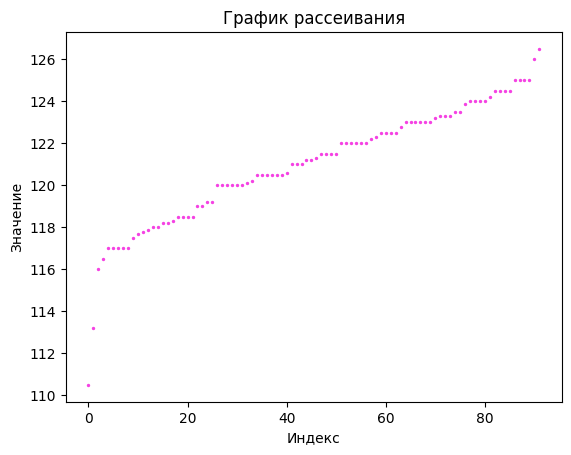

In [52]:
plt.scatter([i for i in range(int(results['selectionLength']))],sortedData, 2,color="#f542e3")
plt.title("График рассеивания")
plt.ylabel("Значение")
plt.xlabel("Индекс");

#### Ящик с усами

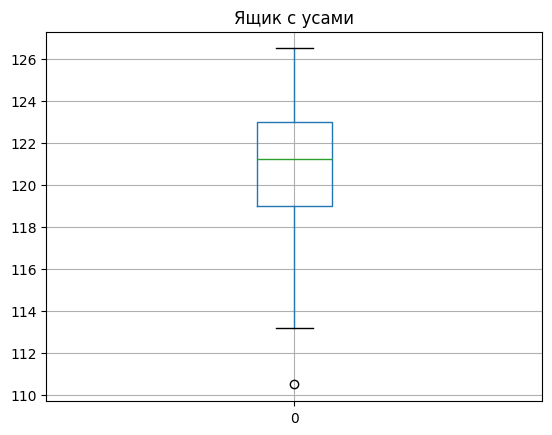

In [53]:
frame.boxplot()
plt.title("Ящик с усами");

#### Частотная гистограмма

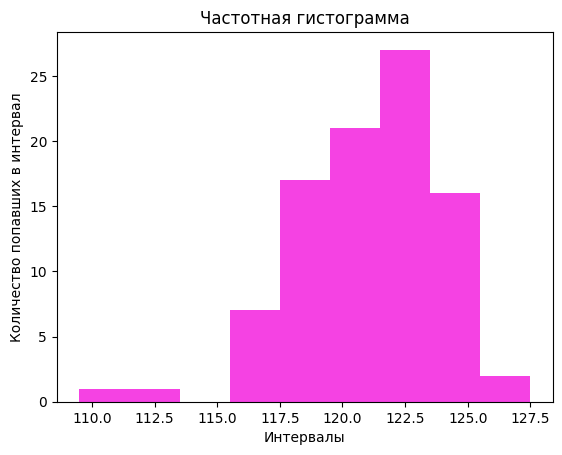

In [54]:
plt.hist(sortedData, bins=barData['intervals'], color="#f542e3")
plt.title('Частотная гистограмма')
plt.ylabel('Количество попавших в интервал')
plt.xlabel('Интервалы');

#### Вероятностная гистограмма

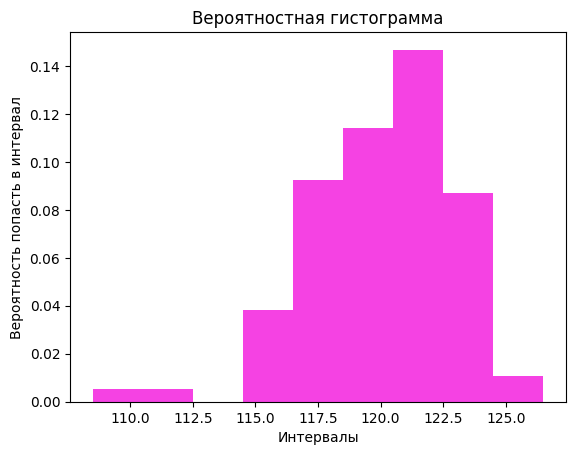

In [55]:
# plt.hist(sortedData, bins=barData['intervals'],density=True, color="#f542e3")
# plt.hist(barData['intervals'][:-1],bins=barData['intervalsCount'],weights=barData['weights'],color="#f542e3")
# sns.histplot(sortedData, bins=barData["intervals"], color="#f542e3",stat='density',kde=True)
plt.bar(barData['intervals'][:-1], barData['weights'],barData['step'],color="#f542e3")
plt.title('Вероятностная гистограмма')
plt.ylabel('Вероятность попасть в интервал')
plt.xlabel('Интервалы');

#### Эмпирическая функция распределения

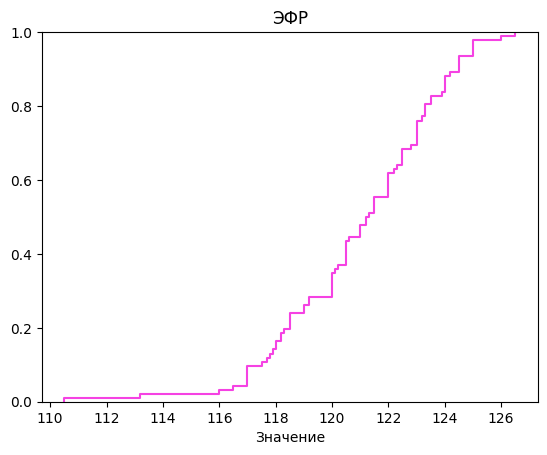

In [56]:
plt.ecdf(sortedData, color="#f542e3")
plt.title('ЭФР')
plt.xlabel('Значение');